In [45]:
import pandas as pd
import sqlite3
import os
import sys
sys.path.append('../')
from functions import WeatherDatabase
from matplotlib import pyplot as plt
import seaborn as sns

In [46]:
db = WeatherDatabase('../Database/WeatherGBG.db')

In [47]:
conn = sqlite3.connect('../Database/WeatherGBG.db')

In [48]:
query_gbg = """SELECT * FROM temp_gbg_raw"""

In [49]:
df_gbg_temp = pd.read_sql(query_gbg, conn, parse_dates=['Datum', 'Datum_date'])

In [50]:
df_gbg_temp = df_gbg_temp.drop(columns=['Datum_date', 'id'])

In [51]:
query_save = """SELECT * FROM temp_save_raw"""

In [52]:
df_save_temp = pd.read_sql(query_save, conn, parse_dates=['Datum', 'Datum_date'])

In [53]:
df_save_temp = df_save_temp.drop(columns=['Datum_date', 'id'])

In [54]:
df_gbg_temp

,Datum,Tid_UTC,Lufttemperatur,Kvalitet
0,1961-01-01,06:00:00,0.8,G
1,1961-01-01,12:00:00,1.0,G
2,1961-01-01,18:00:00,1.4,G
3,1961-01-02,06:00:00,1.8,G
4,1961-01-02,12:00:00,2.2,G
...,...,...,...,...
308145,2023-07-01,02:00:00,16.1,G
308146,2023-07-01,03:00:00,16.1,G
308147,2023-07-01,04:00:00,16.2,G
308148,2023-07-01,05:00:00,16.3,G


In [55]:
df_save_temp

,Datum,Tid_UTC,Lufttemperatur,Kvalitet
0,1944-01-01,07:00:00,1.6,G
1,1944-01-01,13:00:00,3.8,G
2,1944-01-01,18:00:00,4.2,G
3,1944-01-02,07:00:00,0.6,G
4,1944-01-02,13:00:00,3.8,G
...,...,...,...,...
435387,2006-12-05,09:00:00,9.4,G
435388,2006-12-05,10:00:00,10.1,Y
435389,2006-12-05,11:00:00,10.8,Y
435390,2006-12-05,12:00:00,10.9,G


In [56]:
query_gbg_limit = """SELECT * FROM temp_gbg_raw WHERE Datum < '2006-12-06'"""

In [57]:
df_gbg_limit = pd.read_sql(query_gbg_limit, conn, parse_dates=['Datum', 'Datum_date']).drop(columns=['id', 'Datum_date'])

In [58]:
df_gbg_limit

,Datum,Tid_UTC,Lufttemperatur,Kvalitet
0,1961-01-01,06:00:00,0.8,G
1,1961-01-01,12:00:00,1.0,G
2,1961-01-01,18:00:00,1.4,G
3,1961-01-02,06:00:00,1.8,G
4,1961-01-02,12:00:00,2.2,G
...,...,...,...,...
166182,2006-12-05,19:00:00,11.3,Y
166183,2006-12-05,20:00:00,11.1,Y
166184,2006-12-05,21:00:00,10.9,G
166185,2006-12-05,22:00:00,10.8,Y


In [59]:
query_save_limit = """SELECT * FROM temp_save_raw WHERE Datum >= '1961-01-01'"""

In [60]:
df_save_limit = pd.read_sql(query_save_limit, conn, parse_dates=['Datum', 'Datum_date']).drop(columns=['id', 'Datum_date'])

In [61]:
df_save_limit

,Datum,Tid_UTC,Lufttemperatur,Kvalitet
0,1961-01-01,00:00:00,0.0,Y
1,1961-01-01,03:00:00,0.0,Y
2,1961-01-01,05:00:00,0.0,Y
3,1961-01-01,06:00:00,0.0,Y
4,1961-01-01,07:00:00,0.0,Y
...,...,...,...,...
377100,2006-12-05,09:00:00,9.4,G
377101,2006-12-05,10:00:00,10.1,Y
377102,2006-12-05,11:00:00,10.8,Y
377103,2006-12-05,12:00:00,10.9,G


In [62]:
avg_temp_query= """SELECT *, ROUND(AVG(Lufttemperatur), 2) AS Avg_temp
            FROM temp_GBG_raw
            WHERE Datum > '2000-01-01'
            GROUP BY Datum"""

In [63]:
df_avg_temp_gbg = pd.read_sql(avg_temp_query, conn, parse_dates=['Datum', 'Datum_date']).drop(columns=['id', 'Datum_date'])

In [64]:
df_avg_temp_gbg

,Datum,Tid_UTC,Lufttemperatur,Kvalitet,Avg_temp
0,2000-01-02,00:00:00,2.3,G,4.27
1,2000-01-03,00:00:00,4.1,G,4.88
2,2000-01-04,00:00:00,4.9,G,4.78
3,2000-01-05,00:00:00,2.8,G,3.71
4,2000-01-06,00:00:00,4.3,G,4.86
...,...,...,...,...,...
8547,2023-06-27,00:00:00,16.3,G,18.18
8548,2023-06-28,00:00:00,16.2,G,19.73
8549,2023-06-29,00:00:00,16.8,G,19.23
8550,2023-06-30,00:00:00,19.2,G,17.40


In [65]:
# table 1, gbg

"""SELECT *, ROUND(AVG(Lufttemperatur), 2) AS Avg_temp_gbg
            FROM temp_GBG_raw
            WHERE Datum < '2006-12-06'
            GROUP BY Datum"""

"SELECT *, ROUND(AVG(Lufttemperatur), 2) AS Avg_temp_gbg\n            FROM temp_GBG_raw\n            WHERE Datum < '2006-12-06'\n            GROUP BY Datum"

In [66]:
# table 2, Säve

"""SELECT *, ROUND(AVG(Lufttemperatur), 2) AS Avg_temp_save
            FROM temp_save_raw
            WHERE Datum >= '1961-01-01'
            GROUP BY Datum"""

"SELECT *, ROUND(AVG(Lufttemperatur), 2) AS Avg_temp_save\n            FROM temp_save_raw\n            WHERE Datum >= '1961-01-01'\n            GROUP BY Datum"

In [67]:
join_query = """SELECT gbg.*, ROUND(AVG(gbg.Lufttemperatur), 2) AS Avg_temp_gbg, ROUND(AVG(save.Lufttemperatur), 2) AS Avg_temp_save FROM temp_gbg_raw AS gbg
LEFT JOIN temp_save_raw AS save ON save.Datum = gbg.Datum
WHERE gbg.Datum < '2006-12-06' AND save.Datum >= '1961-01-01'
GROUP BY gbg.Datum
"""

In [68]:
resp = pd.read_sql(join_query, conn, parse_dates=['Datum']).drop(columns=['id', 'Datum_date'])
resp

,Datum,Tid_UTC,Lufttemperatur,Kvalitet,Avg_temp_gbg,Avg_temp_save
0,1961-01-01,06:00:00,0.8,G,1.07,0.36
1,1961-01-02,06:00:00,1.8,G,2.27,1.64
2,1961-01-03,06:00:00,2.6,G,2.27,1.57
3,1961-01-04,06:00:00,2.8,G,2.53,1.38
4,1961-01-05,06:00:00,1.8,G,2.13,1.17
...,...,...,...,...,...,...
13887,2006-12-01,00:00:00,8.8,G,8.35,8.03
13888,2006-12-02,00:00:00,9.6,G,9.10,8.81
13889,2006-12-03,00:00:00,8.9,G,8.50,8.11
13890,2006-12-04,00:00:00,9.5,G,8.99,8.57


In [69]:
resp['Diff'] = resp['Avg_temp_gbg'] - resp['Avg_temp_save'].round(2)

In [70]:
resp

,Datum,Tid_UTC,Lufttemperatur,Kvalitet,Avg_temp_gbg,Avg_temp_save,Diff
0,1961-01-01,06:00:00,0.8,G,1.07,0.36,0.71
1,1961-01-02,06:00:00,1.8,G,2.27,1.64,0.63
2,1961-01-03,06:00:00,2.6,G,2.27,1.57,0.70
3,1961-01-04,06:00:00,2.8,G,2.53,1.38,1.15
4,1961-01-05,06:00:00,1.8,G,2.13,1.17,0.96
...,...,...,...,...,...,...,...
13887,2006-12-01,00:00:00,8.8,G,8.35,8.03,0.32
13888,2006-12-02,00:00:00,9.6,G,9.10,8.81,0.29
13889,2006-12-03,00:00:00,8.9,G,8.50,8.11,0.39
13890,2006-12-04,00:00:00,9.5,G,8.99,8.57,0.42


In [71]:
# resp['Diff'] = resp['Diff'].abs()


In [72]:
resp.sort_values('Diff')


,Datum,Tid_UTC,Lufttemperatur,Kvalitet,Avg_temp_gbg,Avg_temp_save,Diff
3592,1971-01-02,06:00:00,-13.4,G,-7.67,-4.22,-3.45
11061,1998-05-15,00:00:00,9.4,G,11.00,13.91,-2.91
3591,1971-01-01,06:00:00,-16.4,G,-13.27,-10.50,-2.77
3569,1970-12-10,06:00:00,1.2,G,2.93,5.44,-2.51
7361,1987-12-09,00:00:00,-4.6,G,-0.78,1.62,-2.40
...,...,...,...,...,...,...,...
6141,1984-07-09,06:00:00,19.4,G,23.37,18.70,4.67
10550,1996-12-20,00:00:00,-12.7,G,-12.67,-17.56,4.89
5756,1983-06-20,06:00:00,20.4,G,25.13,20.20,4.93
5754,1983-06-18,06:00:00,19.2,G,20.13,15.13,5.00


In [73]:
avg_diff = resp['Diff'].mean()

In [74]:
months = resp['Datum'].dt.month

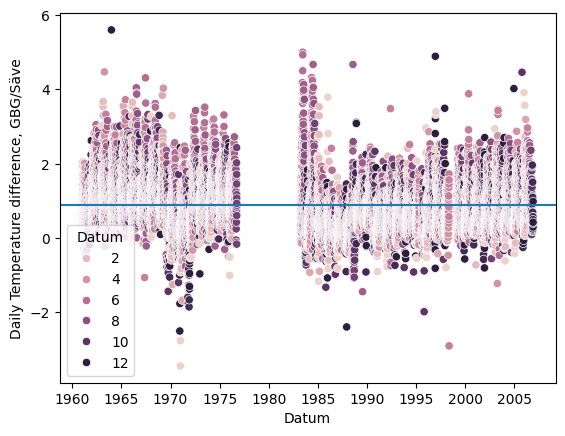

In [75]:
plt.figure
# plt.plot(resp['Datum'], resp['Diff'])
graph = sns.scatterplot(x=resp['Datum'], y=resp['Diff'], hue=months)
graph.axhline(avg_diff)
# plt.axhline(avg_diff, xmin=1960, xmax=2006, color='red', linestyle='--')
# plt.scatter(x=resp['Datum'], y=resp['Diff'])
plt.ylabel('Daily Temperature difference, GBG/Säve')
plt.show()

In [76]:
resp['Month'] = resp['Datum'].dt.month

In [117]:
resp

,Datum,Tid_UTC,Lufttemperatur,Kvalitet,Avg_temp_gbg,Avg_temp_save,Diff,Month
0,1961-01-01,06:00:00,0.8,G,1.07,0.36,0.71,1
1,1961-01-02,06:00:00,1.8,G,2.27,1.64,0.63,1
2,1961-01-03,06:00:00,2.6,G,2.27,1.57,0.70,1
3,1961-01-04,06:00:00,2.8,G,2.53,1.38,1.15,1
4,1961-01-05,06:00:00,1.8,G,2.13,1.17,0.96,1
...,...,...,...,...,...,...,...,...
13887,2006-12-01,00:00:00,8.8,G,8.35,8.03,0.32,12
13888,2006-12-02,00:00:00,9.6,G,9.10,8.81,0.29,12
13889,2006-12-03,00:00:00,8.9,G,8.50,8.11,0.39,12
13890,2006-12-04,00:00:00,9.5,G,8.99,8.57,0.42,12


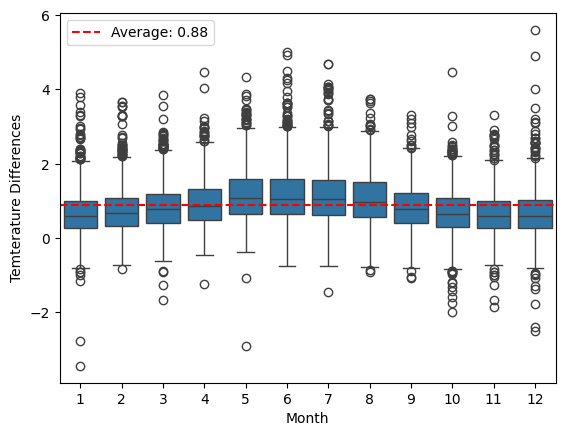

In [88]:
plt.figure()
graph = sns.boxplot(resp, x=resp['Month'], y=resp['Diff'])
graph.axhline(avg_diff, color='r', linestyle='--', label=f'Average: {avg_diff.round(2)}')
graph.legend()
plt.ylabel('Temterature Differences')
plt.show()

In [108]:
avg_diff_per_month = {'Jan': [], 'Feb': [], 'Mar': [], 'Apr': [], 'May': [], 
                      'June': [], 'Jul': [], 'Aug': [], 'Sep': [], 'Oct': [], 'Nov': [], 'Dec': []}
for ind, val in enumerate(avg_diff_per_month.values()):
    diff = resp['Diff'].where(resp['Month'] == ind+1).mean().round(2)
    diff = float(diff)
    val.append(diff)
    # print(resp['Diff'].where(resp['Month'] == i).mean().round(2))

In [116]:
avg_diff_per_month

{'Jan': [0.67],
 'Feb': [0.76],
 'Mar': [0.86],
 'Apr': [0.96],
 'May': [1.16],
 'June': [1.16],
 'Jul': [1.14],
 'Aug': [1.06],
 'Sep': [0.82],
 'Oct': [0.7],
 'Nov': [0.66],
 'Dec': [0.67]}